<a href="https://colab.research.google.com/github/marttech26/parking_availability/blob/main/carpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%pip install ultralytics
!pip install opencv-python-headless
!pip install labelme2yolo

In [4]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


# Visualisation
from matplotlib import pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import figure
from PIL import Image

# Model Building
import ultralytics
from ultralytics import YOLO
import labelme2yolo

# Others
import os
import shutil
import zipfile

%matplotlib inline

In [5]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
!nvidia-smi

Thu Mar 21 15:35:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [17]:
#Loading the model
model = YOLO('yolov8n.pt')

In [18]:
# Display model information (optional)
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [19]:
# Train the model on the dataset for 150 epochs
results = model.train(data='/content/gdrive/MyDrive/car park/data.yaml', epochs=100)

Ultralytics YOLOv8.1.30 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/car park/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

train: Scanning /content/gdrive/MyDrive/car park/train... 2704 images, 235 backgrounds, 0 corrupt: 100%|██████████| 2704/2704 [01:34<00:00, 28.66it/s]


train: New cache created: /content/gdrive/MyDrive/car park/train.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6038, len(boxes) = 7413. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/gdrive/MyDrive/car park/val... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:21<00:00,  1.39it/s]

val: New cache created: /content/gdrive/MyDrive/car park/val.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 61, len(boxes) = 76. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.63G      1.583      2.381      1.638         57        640: 100%|██████████| 169/169 [01:26<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.26s/it]

                   all         30         76      0.626      0.432      0.505      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.38G      1.568      1.943        1.6         71        640: 100%|██████████| 169/169 [01:20<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         30         76       0.57      0.333      0.406      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.34G      1.549      1.821      1.583         86        640: 100%|██████████| 169/169 [01:22<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         30         76      0.797      0.494      0.564      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.38G      1.519      1.734      1.555         76        640: 100%|██████████| 169/169 [01:18<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         30         76      0.951      0.429      0.501      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.37G      1.473      1.641      1.519         62        640: 100%|██████████| 169/169 [01:20<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         30         76      0.993      0.414      0.565      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.37G      1.431      1.589      1.493         81        640: 100%|██████████| 169/169 [01:20<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         30         76      0.787      0.595      0.631      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.37G      1.394      1.513      1.473         72        640: 100%|██████████| 169/169 [01:18<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         30         76      0.756      0.622      0.662      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.37G       1.35      1.464      1.435        103        640: 100%|██████████| 169/169 [01:20<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         30         76      0.802      0.531      0.587      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.37G      1.336      1.424      1.425         70        640: 100%|██████████| 169/169 [01:18<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         30         76      0.622      0.568      0.595      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.36G      1.292      1.381        1.4         87        640: 100%|██████████| 169/169 [01:18<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         30         76      0.844      0.559      0.623      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.36G      1.288      1.374      1.397         83        640: 100%|██████████| 169/169 [01:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         30         76       0.71      0.593      0.653      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.36G      1.269      1.335      1.383         77        640: 100%|██████████| 169/169 [01:18<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         30         76      0.622       0.63      0.636       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.36G      1.256      1.311      1.368         82        640: 100%|██████████| 169/169 [01:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         30         76      0.765      0.634      0.716      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.37G      1.237      1.301      1.373         57        640: 100%|██████████| 169/169 [01:21<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         30         76      0.594      0.681      0.631      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.37G      1.225      1.278      1.355         51        640: 100%|██████████| 169/169 [01:20<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         30         76      0.717      0.671      0.677      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.36G      1.209      1.242      1.337         64        640: 100%|██████████| 169/169 [01:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         30         76      0.728      0.595      0.624      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.37G      1.195      1.235      1.337         71        640: 100%|██████████| 169/169 [01:20<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         30         76      0.682      0.656      0.673      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.37G      1.194       1.23      1.339         79        640: 100%|██████████| 169/169 [01:20<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         30         76      0.619      0.598      0.607      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.36G      1.187      1.205      1.323         73        640: 100%|██████████| 169/169 [01:18<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         30         76      0.813      0.634      0.673       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.37G      1.164      1.192      1.312         62        640: 100%|██████████| 169/169 [01:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         30         76      0.755      0.712      0.677      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.37G       1.17      1.197      1.315         80        640: 100%|██████████| 169/169 [01:21<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         30         76      0.623      0.622      0.604      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.37G      1.159      1.174      1.306         67        640: 100%|██████████| 169/169 [01:20<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         30         76      0.678       0.62      0.643        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.37G      1.159      1.176      1.303         73        640: 100%|██████████| 169/169 [01:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         30         76      0.607       0.72      0.679      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.37G      1.132      1.152      1.287         77        640: 100%|██████████| 169/169 [01:21<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         30         76      0.609      0.609      0.616      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.37G      1.114      1.111      1.272         70        640: 100%|██████████| 169/169 [01:21<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         30         76      0.789      0.683      0.698      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.37G      1.107      1.099      1.271         71        640: 100%|██████████| 169/169 [01:20<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         30         76      0.774      0.632      0.697      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.37G      1.097      1.082      1.266         80        640: 100%|██████████| 169/169 [01:20<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         30         76      0.766      0.639      0.709      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.37G      1.095      1.088      1.263        109        640: 100%|██████████| 169/169 [01:21<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         30         76      0.636      0.659       0.65      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.36G      1.092      1.089      1.267         76        640: 100%|██████████| 169/169 [01:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         30         76       0.65      0.583      0.605      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.37G      1.087      1.069      1.261         83        640: 100%|██████████| 169/169 [01:18<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         30         76      0.709      0.681      0.691      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.34G      1.076      1.059      1.254         64        640: 100%|██████████| 169/169 [01:18<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         30         76      0.566       0.61      0.609      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.37G      1.066       1.07      1.247         71        640: 100%|██████████| 169/169 [01:18<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         30         76      0.576      0.571      0.588      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.36G      1.068      1.054       1.24         73        640: 100%|██████████| 169/169 [01:18<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         30         76      0.709      0.634      0.632      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.37G      1.057      1.053       1.25         90        640: 100%|██████████| 169/169 [01:22<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         30         76      0.614      0.702      0.653      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.36G      1.038      1.026      1.228         78        640: 100%|██████████| 169/169 [01:22<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         30         76      0.622      0.691      0.655      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.37G       1.04      1.015       1.23         80        640: 100%|██████████| 169/169 [01:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         30         76      0.783      0.695      0.709       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.34G      1.027      1.012      1.217         85        640: 100%|██████████| 169/169 [01:22<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         30         76      0.652      0.598       0.61      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.37G      1.025      1.012      1.217         88        640: 100%|██████████| 169/169 [01:23<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         30         76      0.817      0.606      0.664      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.36G      1.024     0.9966      1.218         64        640: 100%|██████████| 169/169 [01:23<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         30         76      0.678      0.705      0.679      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.34G       1.02     0.9794      1.211         89        640: 100%|██████████| 169/169 [01:21<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         30         76      0.649      0.618      0.631      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.37G      1.009     0.9894       1.21         53        640: 100%|██████████| 169/169 [01:21<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         30         76      0.649       0.67      0.627      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.37G      1.002     0.9709      1.211         77        640: 100%|██████████| 169/169 [01:20<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         30         76      0.665      0.632      0.631      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.37G     0.9933     0.9708      1.207         66        640: 100%|██████████| 169/169 [01:21<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         30         76      0.671      0.668      0.639      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.38G     0.9971     0.9694      1.207         77        640: 100%|██████████| 169/169 [01:18<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         30         76        0.7      0.655      0.675      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.36G     0.9818     0.9612      1.198         73        640: 100%|██████████| 169/169 [01:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         30         76      0.611      0.672      0.662      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.38G     0.9838      0.947      1.195         64        640: 100%|██████████| 169/169 [01:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         30         76      0.628      0.683      0.616      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.37G     0.9686     0.9368      1.181         71        640: 100%|██████████| 169/169 [01:20<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         30         76      0.704      0.695      0.691      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.34G     0.9664     0.9317       1.18         92        640: 100%|██████████| 169/169 [01:17<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         30         76      0.579      0.646      0.591      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.36G     0.9635     0.9294      1.182         80        640: 100%|██████████| 169/169 [01:20<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         30         76      0.728       0.61      0.626      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.37G     0.9507     0.9061      1.176         60        640: 100%|██████████| 169/169 [01:20<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         30         76      0.593      0.646      0.608      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.37G     0.9522     0.9087      1.175         79        640: 100%|██████████| 169/169 [01:20<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         30         76      0.622      0.706       0.61       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.36G     0.9507     0.9068      1.171         91        640: 100%|██████████| 169/169 [01:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         30         76      0.585      0.707      0.617      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.36G     0.9506     0.9011      1.175         67        640: 100%|██████████| 169/169 [01:17<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         30         76      0.662      0.634      0.629      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.36G     0.9261     0.8844      1.159         97        640: 100%|██████████| 169/169 [01:16<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         30         76      0.659      0.683      0.676      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.37G     0.9366      0.888       1.16         90        640: 100%|██████████| 169/169 [01:18<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         30         76      0.633      0.763      0.695      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.37G     0.9284     0.8953      1.163         74        640: 100%|██████████| 169/169 [01:20<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         30         76      0.572      0.725       0.62      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.37G     0.9107     0.8646      1.145         55        640: 100%|██████████| 169/169 [01:17<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         30         76      0.591      0.715       0.64      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.34G     0.9052     0.8638      1.152         76        640: 100%|██████████| 169/169 [01:16<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         30         76      0.617      0.705      0.651      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.37G     0.9141     0.8707      1.143         83        640: 100%|██████████| 169/169 [01:20<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         30         76      0.598       0.69      0.625       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.37G     0.9106     0.8612      1.145         90        640: 100%|██████████| 169/169 [01:22<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         30         76       0.62      0.659      0.641      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.36G     0.9048      0.856      1.144         62        640: 100%|██████████| 169/169 [01:21<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         30         76       0.63      0.695      0.651      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.37G     0.8986     0.8535      1.143         60        640: 100%|██████████| 169/169 [01:20<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         30         76      0.609      0.634      0.629      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.36G     0.8954     0.8468      1.144         78        640: 100%|██████████| 169/169 [01:21<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         30         76      0.583      0.693      0.613      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.37G     0.8974     0.8445      1.136         94        640: 100%|██████████| 169/169 [01:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         30         76      0.593      0.693      0.641       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.37G     0.8847      0.833      1.138         66        640: 100%|██████████| 169/169 [01:20<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         30         76       0.57      0.707      0.621      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.37G     0.8892     0.8412       1.14         70        640: 100%|██████████| 169/169 [01:20<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         30         76      0.681      0.625      0.634      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.36G      0.889     0.8404      1.136         72        640: 100%|██████████| 169/169 [01:20<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         30         76      0.599      0.683      0.636      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.37G     0.8857     0.8304      1.134         63        640: 100%|██████████| 169/169 [01:16<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         30         76      0.589      0.744      0.639      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.36G     0.8589     0.8078       1.12         94        640: 100%|██████████| 169/169 [01:18<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         30         76      0.561      0.695      0.626      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.37G     0.8662     0.8066      1.122         86        640: 100%|██████████| 169/169 [01:17<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         30         76      0.602       0.72      0.642      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.37G      0.862      0.804      1.119         58        640: 100%|██████████| 169/169 [01:18<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         30         76      0.653      0.681      0.666      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.37G     0.8595     0.7936      1.118         91        640: 100%|██████████| 169/169 [01:17<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         30         76      0.599      0.718      0.624      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.38G     0.8517     0.8064      1.116         85        640: 100%|██████████| 169/169 [01:16<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         30         76      0.648      0.683      0.653      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.36G     0.8521     0.7777      1.109         72        640: 100%|██████████| 169/169 [01:15<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         30         76      0.626      0.683      0.648      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.34G     0.8424     0.7776      1.101        102        640: 100%|██████████| 169/169 [01:18<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         30         76      0.637      0.724      0.664      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.37G     0.8343     0.7755      1.103         78        640: 100%|██████████| 169/169 [01:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         30         76      0.646      0.671      0.644      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.37G     0.8406     0.7748      1.106         95        640: 100%|██████████| 169/169 [01:24<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         30         76      0.703      0.629       0.65      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.34G     0.8312     0.7617      1.101         67        640: 100%|██████████| 169/169 [01:24<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         30         76      0.662       0.72      0.676      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.36G     0.8237     0.7557        1.1         77        640: 100%|██████████| 169/169 [01:25<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         30         76      0.712      0.667      0.654      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.35G      0.825     0.7642      1.097         71        640: 100%|██████████| 169/169 [01:26<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         30         76      0.648       0.73      0.663      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.37G     0.8227     0.7462      1.098         87        640: 100%|██████████| 169/169 [01:26<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         30         76      0.642      0.751      0.664      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.36G     0.8141     0.7434      1.094        100        640: 100%|██████████| 169/169 [01:25<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         30         76      0.633      0.735      0.654      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.24G     0.8198     0.7511      1.093         80        640: 100%|██████████| 169/169 [01:26<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         30         76      0.678      0.683      0.667      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.36G      0.807     0.7335      1.087         85        640: 100%|██████████| 169/169 [01:25<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         30         76      0.634       0.72      0.647      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.36G     0.8075     0.7398       1.09         81        640: 100%|██████████| 169/169 [01:26<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         30         76      0.624      0.744      0.636      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.37G     0.8084     0.7517      1.095         93        640: 100%|██████████| 169/169 [01:26<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         30         76      0.629      0.742      0.646       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.36G     0.7908     0.7303      1.082         75        640: 100%|██████████| 169/169 [01:26<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         30         76      0.618      0.707      0.641      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.36G      0.788     0.7209      1.076        102        640: 100%|██████████| 169/169 [01:25<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         30         76      0.615      0.765       0.64      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.36G     0.7956     0.7137      1.085         96        640: 100%|██████████| 169/169 [01:26<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         30         76      0.605       0.72      0.631      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.38G     0.7898     0.7157      1.085         66        640: 100%|██████████| 169/169 [01:25<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all         30         76      0.628      0.732      0.642      0.509


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.33G     0.7162     0.6146      1.041         40        640: 100%|██████████| 169/169 [01:25<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         30         76      0.639      0.701      0.664      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.33G     0.7062     0.5936      1.035         44        640: 100%|██████████| 169/169 [01:21<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         30         76      0.657      0.768      0.662      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.34G     0.6914      0.591      1.027         42        640: 100%|██████████| 169/169 [01:21<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         30         76      0.671      0.738      0.678       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.33G     0.6762     0.5705      1.016         43        640: 100%|██████████| 169/169 [01:21<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         30         76      0.654       0.72       0.66      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.33G     0.6767     0.5662      1.021         32        640: 100%|██████████| 169/169 [01:22<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         30         76      0.659       0.72      0.659      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.33G     0.6733     0.5647      1.017         45        640: 100%|██████████| 169/169 [01:22<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         30         76      0.647      0.744      0.671      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.33G     0.6683     0.5551      1.014         39        640: 100%|██████████| 169/169 [01:23<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         30         76      0.653      0.751      0.672      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.33G     0.6679     0.5619      1.012         45        640: 100%|██████████| 169/169 [01:22<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         30         76      0.647      0.756       0.67      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.33G     0.6604       0.55      1.011         50        640: 100%|██████████| 169/169 [01:20<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         30         76      0.637       0.75      0.668      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.33G     0.6537     0.5476      1.005         46        640: 100%|██████████| 169/169 [01:21<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         30         76      0.651      0.743      0.667       0.53



100 epochs completed in 2.303 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.30 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]


                   all         30         76      0.785      0.683      0.698      0.544
              OCCUPIED         30         41      0.674      0.366      0.415      0.253
                 EMPTY         30         35      0.897          1      0.981      0.835
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train2


In [20]:
import shutil

# Define the paths
source_folder = '/content/runs/detect/train2'  # Path to the folder you want to copy
destination_folder = '/content/gdrive/MyDrive/car park/results_parking'  # Destination path in Google Drive

# Copy the folder recursively
shutil.copytree(source_folder, destination_folder)


'/content/gdrive/MyDrive/car park/results_parking'

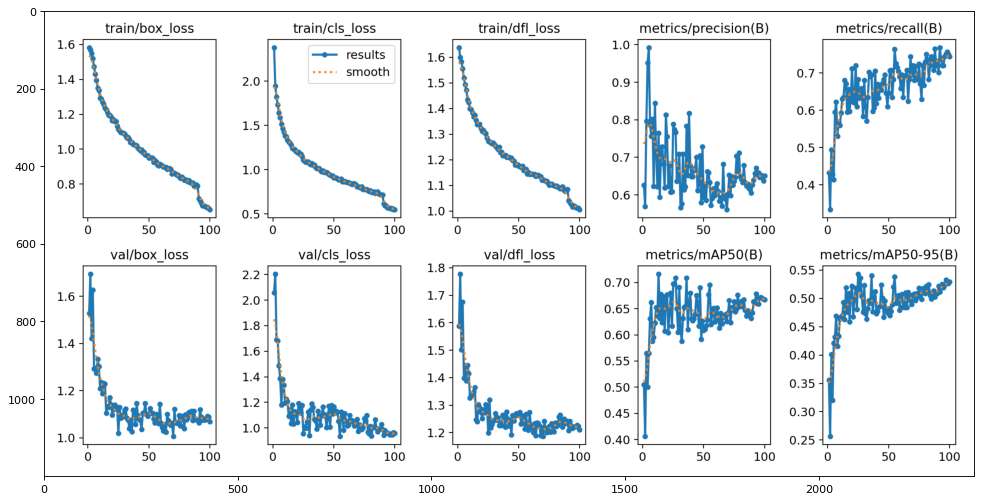

In [21]:
figure(figsize=(15, 10), dpi=80)
# reading the image
results = img.imread('runs/detect/train2/results.png')
# displaying the image
plt.imshow(results)

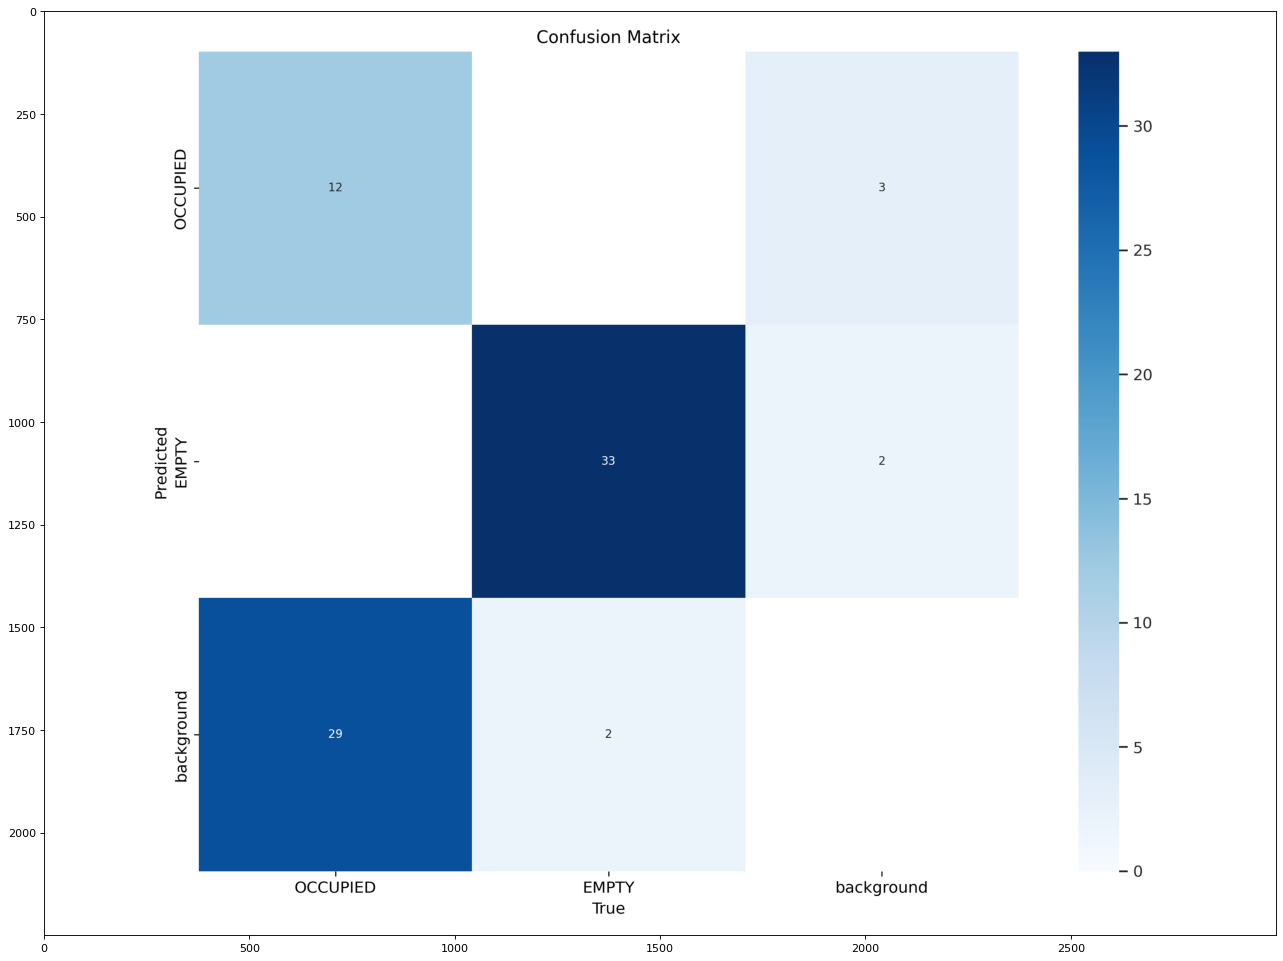

In [22]:
figure(figsize=(20,15), dpi=80)
# reading the image
cf = img.imread('runs/detect/train2/confusion_matrix.png')
# displaying the image
plt.imshow(cf)

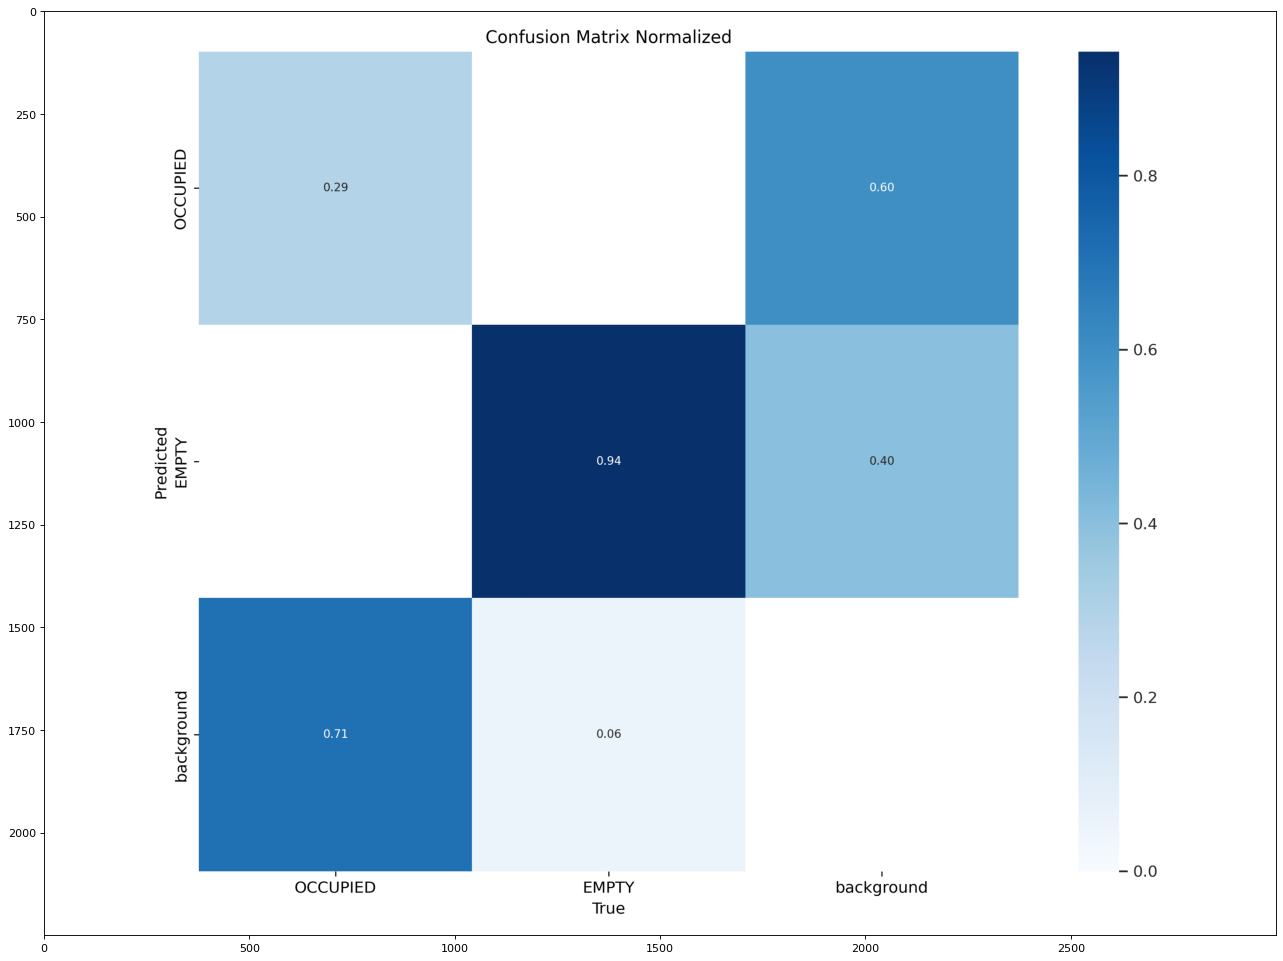

In [23]:
figure(figsize=(20,15), dpi=80)
# reading the image
cf = img.imread('runs/detect/train2/confusion_matrix_normalized.png')
# displaying the image
plt.imshow(cf)

Making Predictions on the Submission Video

In [7]:
#load model
model = YOLO('/content/gdrive/MyDrive/car park/results_parking/weights/best.pt')

In [9]:
# run predictions
results = model('/content/gdrive/MyDrive/car park/Test videos/park_1.mp4', show =True, save= True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/952) /content/gdrive/MyDrive/car park/Test videos/park_1.mp4: 384x640 (no detections), 219.5ms
video 1/1 (frame 2/952) /content/gdrive/MyDrive/car park/Test videos/park_1.mp4: 384x640 (no detections), 13.5ms
video 1/1 (frame 3/952) /content/gdrive/MyDrive/car park/Test videos/park_1.mp4: 384x640 (no detections), 13.3ms
video 1/1 (frame 4/952) /content/gdrive/My

In [ ]:
# 2nd prediction
results = model('/content/gdrive/MyDrive/car park/Test videos/park_2.mp4', show =True, save= True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

